<a href="https://colab.research.google.com/github/gulabpatel/TimeSeries/blob/main/Time_Series_AutoARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to video explaining the code below  https://www.youtube.com/watch?v=MngVV_4l9Po

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [4]:
df

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0000,46.13
1,2012-01-01 01:00:00,4752.1,0.0000,45.89
2,2012-01-01 02:00:00,4542.6,0.0000,45.04
3,2012-01-01 03:00:00,4357.7,0.0000,45.03
4,2012-01-01 04:00:00,4275.5,0.0000,42.61
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [5]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [7]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [8]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [9]:
ny_df=df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fe3747668>,
      dtype=object)

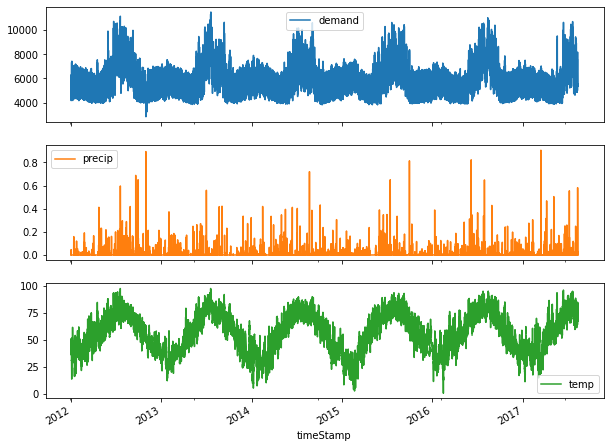

In [10]:
ny_df.plot(subplots=True)

In [11]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  49205
Columns  :  4

Features : 
 ['timeStamp', 'demand', 'precip', 'temp']

Missing values :   timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

Unique values :  
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


#Checking the missing value

In [12]:
df.query('demand != demand')

,timeStamp,demand,precip,temp
49124,2012-03-11 02:00:00,NaN,0.0000,37.78
49125,2013-03-10 02:00:00,NaN,0.0000,38.18
49126,2014-03-09 02:00:00,NaN,0.0000,40.86
49127,2015-03-08 02:00:00,NaN,0.0000,36.96
49128,2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [13]:
df['demand']=df['demand'].fillna(method='ffill')
df['temp']=df['temp'].fillna(method='ffill')

In [14]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   timeStamp    False
demand       False
precip        True
temp         False
dtype: bool


In [15]:
ny_df=df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fe3126e10>,
      dtype=object)

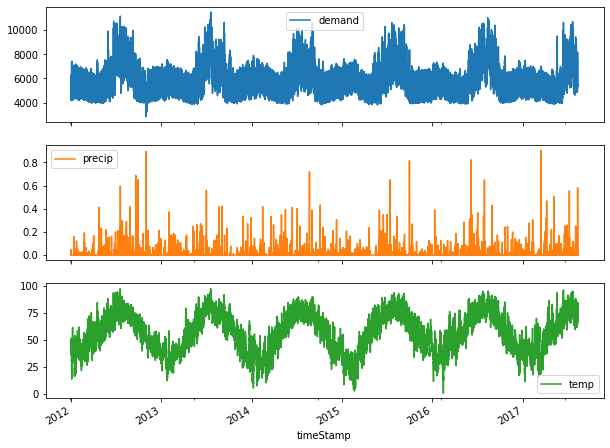

In [16]:
ny_df.plot(subplots=True)

In [17]:
ny_df.resample('M').mean()

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fe08b20b8>,
      dtype=object)

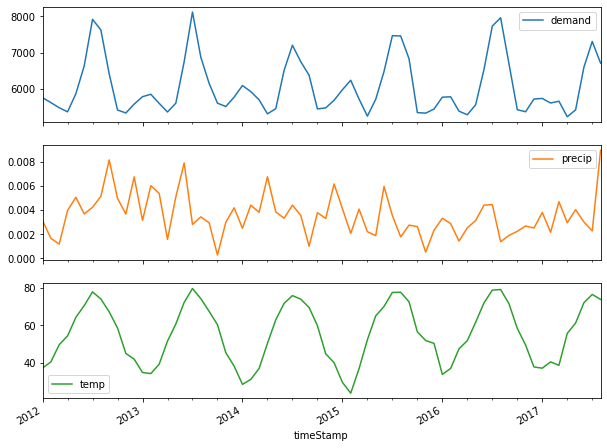

In [18]:
ny_df.resample('M').mean().plot(subplots=True)

In [19]:
ny_df_monthly=ny_df.resample('M').mean()

#What is autoarima? 
It's a kind of grid search. ARIMA model has basically thre parameters,
* p-order of auto regressive part
* d-number of non-seasonal difference(lag)
* q-order of moving regressive part

In [20]:
!pip install pmdarima

In [21]:
import pmdarima as pm

model = pm.auto_arima(ny_df_monthly['demand'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True) #stepwise true means random search

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.60 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1026.318, Time=1.73 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1101.718, Time=0.06 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.059, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.08 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1013.801, Time=2.18 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=in

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Sun, 15 Nov 2020   AIC                            993.144
Time:                                         22:36:14   BIC                           1006.461
Sample:                                              0   HQIC                           998.420
                                                  - 68                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.261      4.697      0.000    2168.819    5274.425
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (Q):                       64.20   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.01   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
ny_df_monthly

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


In [24]:
train=ny_df_monthly[(ny_df_monthly.index.get_level_values(0) >= '2012-01-31') & (ny_df_monthly.index.get_level_values(0) <= '2017-04-30')]
test=ny_df_monthly[(ny_df_monthly.index.get_level_values(0) > '2017-04-30')]

In [25]:
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002272,76.380363
2017-08-31,6711.707542,0.008961,73.730258


In [26]:
test.shape

(4, 3)

In [27]:
model.fit(train['demand'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [28]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [29]:
forecast

(array([5320.83276481, 6194.15059103, 7184.10813912, 7297.99963102]),
 array([[4724.3701973 , 5917.29533232],
        [5391.43561482, 6996.86556723],
        [6358.6199663 , 8009.59631194],
        [6467.74937119, 8128.24989086]]))

In [30]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [31]:
forecast_df

,Prediction
timeStamp,
2017-05-31,5320.832765
2017-06-30,6194.150591
2017-07-31,7184.108139
2017-08-31,7297.999631


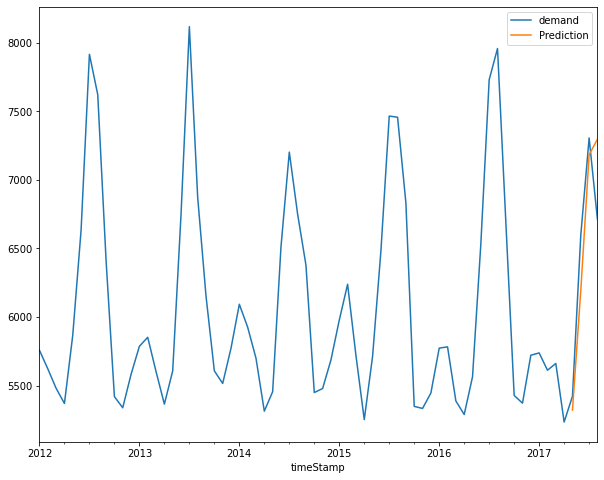

In [32]:
pd.concat([ny_df_monthly['demand'],forecast_df],axis=1).plot()

In [33]:
forecast1=model.predict(n_periods=8, return_conf_int=True)

In [34]:
forecast1

(array([5320.83276481, 6194.15059103, 7184.10813912, 7297.99963102,
        6401.92728851, 5789.92421436, 5693.03964211, 5951.57310624]),
 array([[4724.3701973 , 5917.29533232],
        [5391.43561482, 6996.86556723],
        [6358.6199663 , 8009.59631194],
        [6467.74937119, 8128.24989086],
        [5553.64733135, 7250.20724568],
        [4934.10753803, 6645.74089069],
        [4837.08540927, 6548.99387495],
        [5094.94723912, 6808.19897336]]))

In [35]:
forecast_range=pd.date_range(start='2017-05-31', periods=8,freq='M')

In [36]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

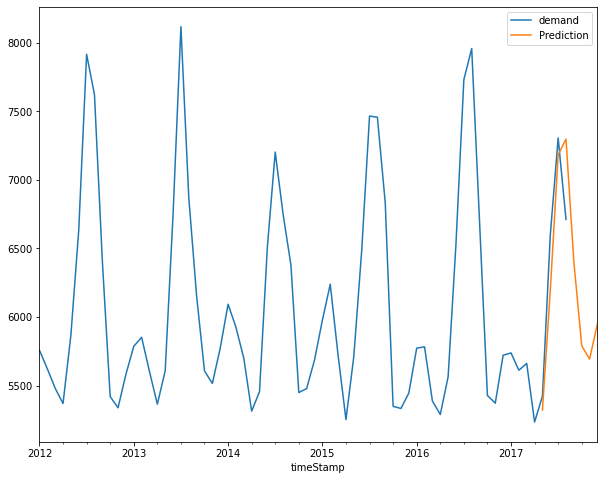

In [37]:
pd.concat([ny_df_monthly['demand'],forecast1_df],axis=1).plot()

In [38]:
lower=pd.Series(forecast1[1][:, 0], index =forecast_range)
upper=pd.Series(forecast1[1][:, 1], index =forecast_range)

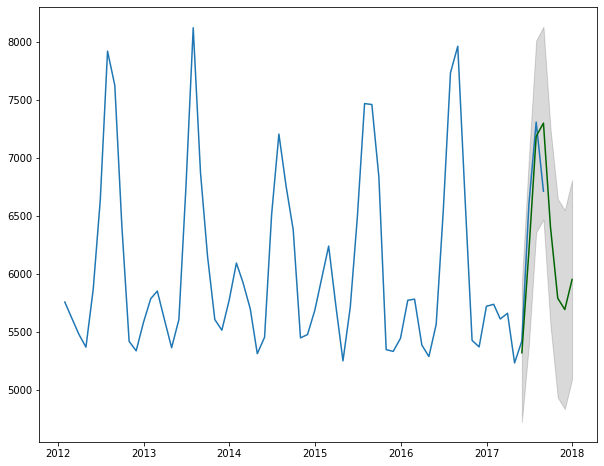

In [39]:
plt.plot(ny_df_monthly['demand'])
plt.plot(forecast1_df, color='darkgreen')
plt.fill_between(forecast_range, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)

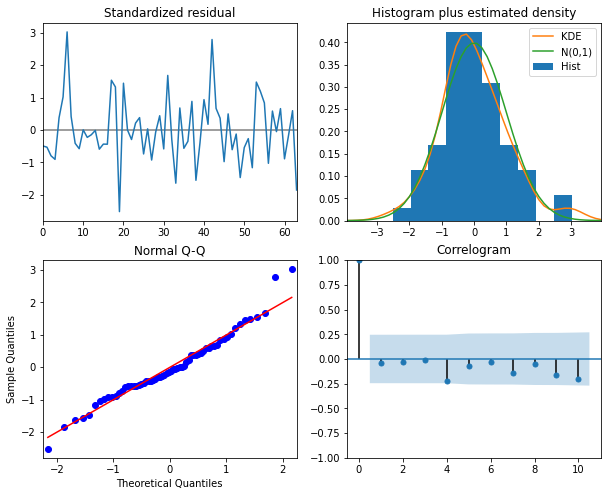

In [40]:
out=model.plot_diagnostics()